# General Setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
%pdb off

from pyCascade import probePost, physics, quantities
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.colors as mcolors

plt.rcParams['figure.dpi'] = 140
im_scaling = .75
plt.rcParams['figure.figsize'] = [6.4 * im_scaling, 4.8 * im_scaling]

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)
plt.close('all')



Automatic pdb calling has been turned OFF


'/scratch/users/nbachand/Cascade/city_block_cfd'

'/oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd'

# Runs

In [15]:
runs = {
    # 246: {'A': 45, 'WS': 2, 'C': 2, 'starts': [40000, 160000], 'stops': [119000, 240000], 'delT': [0, 5], 'SS': [True, True]},
    # 247: {'A': 45, 'WS': 4, 'C': 2, 'starts': [40000, 160000], 'stops': [119000, 240000], 'delT': [0, 5], 'SS': [True, True]},
    # 248: {'A': 0,  'WS': 2, 'C': 2, 'starts': [40000, 160000], 'stops': [119000, 240000], 'delT': [0, 5], 'SS': [True, True]},
    # 249: {'A': 0,  'WS': 4, 'C': 2, 'starts': [40000, 160000], 'stops': [119000, 240000], 'delT': [0, 5], 'SS': [True, True]},
    316: {'A': 45, 'WS': 2, 'C': 3, 'starts': [40000, 160000], 'stops': [119000, 240000], 'delT': [0, 5], 'SS': [True, True]},
    318: {'A': 45, 'WS': 4, 'C': 3, 'starts': [40000, 160000], 'stops': [119000, 240000], 'delT': [0, 5], 'SS': [True, True]},
    317: {'A': 0,  'WS': 2, 'C': 3, 'starts': [40000, 160000], 'stops': [119000, 240000], 'delT': [0, 5], 'SS': [True, True]},
    319: {'A': 0,  'WS': 4, 'C': 3, 'starts': [40000, 160000], 'stops': [119000, 240000], 'delT': [0, 5], 'SS': [True, True]},
}

plotFolder = f"{home_dir}/CHARLES/multiPlots/"

qoisOutputed = ["mag(u)_avg", "mag(u)_rms", "comp(u_rms,0)", "comp(u_rms,1)", "comp(u_rms,2)", "comp(u_avg,0)", "comp(u_avg,1)", "comp(u_avg,2)"]

In [16]:
allABLVolStats = {}
overWrite = True
for run in runs:
    C = runs[run]['C']
    category = f"config{C}"
    R = run % 100
    probes_dir = f'{scratch_dir}/CHARLES/{category}/R{R}/probes/probesOut'
    oak_probes_dir =  f'{home_dir}/CHARLES/{category}/R{R}/probes/probesOut_parquet/'
    print(R)
    starts = runs[run]['starts']
    stops = runs[run]['stops']
    delT = runs[run]['starts']
    SS = runs[run]['SS']
    if len(set([len(starts), len(stops), len(delT), len(SS)])) != 1:
        raise Exception(f"Run {runs} has array properties of different lengths")
    for j, start in enumerate(starts):
        stop = stops[j]
        ABLVolStatsPath = f"{oak_probes_dir}/../ABLVolStats-{start}to{stop}.csv"
        paths = [ABLVolStatsPath]
        for path in paths:
            if os.path.exists(path) == False or overWrite:
                print(f"Creating stats for {run} from steps {start} to {stop}. Saving to {path}...")
                if j ==0:
                    print(f"reading probes from {oak_probes_dir}")
                    probes = probePost.Probes(probes_dir, directory_parquet = oak_probes_dir, file_type = "parquet", probe_type = "VOLUMETRIC_PROBES", flux_quants = qoisOutputed, name_pattern = "VolProbe")
                    # continue
                stats = probes.statistics(
                    names = probes.probe_names, 
                    steps = [stop],
                    quants = qoisOutputed,
                    processing = None,
                    parrallel=False
                )
                display(stats)
                stats.to_csv(ABLVolStatsPath)

        ABLVolStats = pd.read_csv(ABLVolStatsPath, index_col=0)
        for k, v in runs[run].items():
            if isinstance(v, list):
                ABLVolStats[k] = v[j]
            else:
                ABLVolStats[k] = v

        allABLVolStats[int(10*run + j)] = ABLVolStats


16
Creating stats for 316 from steps 40000 to 119000. Saving to /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R16/probes/probesOut_parquet//../ABLVolStats-40000to119000.csv...
reading probes from /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R16/probes/probesOut_parquet/
processing data took 61 seconds


,"comp(u_avg,0)","comp(u_avg,1)","comp(u_avg,2)","comp(u_rms,0)","comp(u_rms,1)","comp(u_rms,2)",mag(u)_avg,mag(u)_rms
VolProbe0_0-0,0.667815,-0.005866,0.400103,0.446368,0.170367,0.377166,1.010308,0.440002
VolProbe0_0-1,0.710905,-0.011946,0.480021,0.471106,0.207307,0.449825,1.169915,0.461508
VolProbe0_0-2,0.393574,-0.004743,0.857351,0.408771,0.192461,0.444456,1.180069,0.438837
VolProbe0_0-3,0.238475,0.003992,0.730613,0.330363,0.169930,0.377474,0.968622,0.369817
VolProbe0_1-0,0.454739,0.003089,0.385245,0.375045,0.158269,0.350700,0.850831,0.374879
...,...,...,...,...,...,...,...,...
VolProbe9_2-3,1.597622,-0.056296,1.583855,0.571317,0.349369,0.528886,2.315749,0.665477
VolProbe9_3-0,1.661070,-0.059590,1.686868,0.535855,0.351926,0.534188,2.433219,0.637809
VolProbe9_3-1,1.264580,-0.024450,1.605946,0.482000,0.332701,0.508101,2.108487,0.587599
VolProbe9_3-2,0.953215,0.082079,0.963280,0.457715,0.294133,0.396310,1.447422,0.489732


Creating stats for 316 from steps 160000 to 240000. Saving to /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R16/probes/probesOut_parquet//../ABLVolStats-160000to240000.csv...
processing data took 64 seconds


,"comp(u_avg,0)","comp(u_avg,1)","comp(u_avg,2)","comp(u_rms,0)","comp(u_rms,1)","comp(u_rms,2)",mag(u)_avg,mag(u)_rms
VolProbe0_0-0,0.854824,-0.005166,0.449178,0.446653,0.195947,0.403664,1.233799,0.417599
VolProbe0_0-1,0.948470,-0.015230,0.521070,0.518291,0.241437,0.491479,1.439225,0.484468
VolProbe0_0-2,0.516516,-0.006964,1.027667,0.493086,0.238222,0.515451,1.459843,0.486909
VolProbe0_0-3,0.289250,0.004030,0.980302,0.422436,0.227748,0.475063,1.273917,0.437906
VolProbe0_1-0,0.542388,0.002098,0.520265,0.424869,0.201920,0.429902,1.079683,0.394613
...,...,...,...,...,...,...,...,...
VolProbe9_2-3,2.037315,-0.071493,1.778476,0.500404,0.385953,0.476506,2.770818,0.539701
VolProbe9_3-0,2.085797,-0.077928,1.942075,0.510617,0.397026,0.522221,2.920923,0.570579
VolProbe9_3-1,1.680352,-0.043882,2.022492,0.539068,0.421014,0.547271,2.713402,0.581961
VolProbe9_3-2,1.127050,0.109843,1.231756,0.446186,0.354279,0.437448,1.784099,0.454894


18
Creating stats for 318 from steps 40000 to 119000. Saving to /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R18/probes/probesOut_parquet//../ABLVolStats-40000to119000.csv...
reading probes from /oak/stanford/groups/gorle/nbachand/Cascade/city_block_cfd/CHARLES/config3/R18/probes/probesOut_parquet/


In [6]:
ABLVolStatsMI = pd.concat(allABLVolStats.values(), keys=allABLVolStats.keys())


In [7]:
def processVolProbeNames(s, pos = None):
    # Filter out any characters that are not digits, a decimal point, or a negative sign
    filtered = ''.join(c for c in s if c.isdigit() or c == '.' or c == '_')
    filtered = filtered.split('_')
    
    # Convert the filtered string to float
    if filtered:
        if pos is not None:
            return float(filtered[1][pos])
        else:
            return float(''.join(filtered[0]))

In [9]:
stats.index

Index(['VolProbe0_0-0', 'VolProbe1_0-0', 'VolProbe2_0-0', 'VolProbe3_0-0',
       'VolProbe4_0-0', 'VolProbe5_0-0', 'VolProbe6_0-0', 'VolProbe7_0-0',
       'VolProbe8_0-0', 'VolProbe9_0-0',
       ...
       'VolProbe34_3-3', 'VolProbe36_3-3', 'VolProbe40_3-3', 'VolProbe44_3-3',
       'VolProbe48_3-3', 'VolProbe52_3-3', 'VolProbe56_3-3', 'VolProbe60_3-3',
       'VolProbe64_3-3', 'VolProbe69_3-3'],
      dtype='object', length=560)

2460
0.7853981633974483
0.0-0.0: 0: u* = 0.13799443465761352, z0 = 0.014759918654648242, disp = 4.629349773222647
0.0-1.0: 3: u* = 0.2051384863719687, z0 = 0.03767956664573356, disp = 4.488253802296839
0.0-2.0: 2: u* = 0.2354902401508926, z0 = 0.09730835460086072, disp = 4.024997706007326
0.0-3.0: 1: u* = 0.2623504705632682, z0 = 0.6848550066888353, disp = 1.1146939388305845
1.0-0.0: 1: u* = 0.21901219884085465, z0 = 0.3195108224204763, disp = 2.6420681859485633
1.0-1.0: 0: u* = 0.12292839076283818, z0 = 0.0062831631164549035, disp = 4.688070413093771
1.0-2.0: 3: u* = 0.20398743795791172, z0 = 0.036167648299460745, disp = 4.589919453587232
1.0-3.0: 2: u* = 0.22843374745295777, z0 = 0.08160191951320726, disp = 4.147775070502546
2.0-0.0: 2: u* = 0.23607425638411292, z0 = 0.0990064394282793, disp = 3.9630267786779387
2.0-1.0: 1: u* = 0.24262075533857633, z0 = 0.49478794653131325, disp = 1.9696230876952026
2.0-2.0: 0: u* = 0.12942002524301205, z0 = 0.009787469521317675, disp = 4.4329726118

ValueError: `x0` is infeasible.

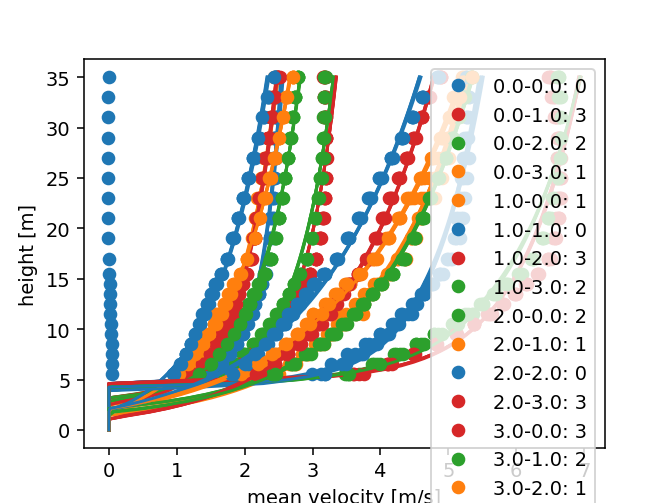

In [14]:
ABLFits = pd.DataFrame(columns=["uStar", "z0", "disp"])
fig, ax = plt.subplots()
for i, (k, df) in enumerate(allABLVolStats.items()):
    print(k)
    stats = df.copy()
    stats["lowerBound"] = stats.index.map(lambda s: processVolProbeNames(s))
    stats["xPos"] = stats.index.map(lambda s: processVolProbeNames(s, pos=0))
    stats["zPos"] = stats.index.map(lambda s: processVolProbeNames(s, pos=1))
    stats.sort_values(by = ["xPos", "zPos", "lowerBound"], inplace=True)

    stats["upperBound"] = stats["lowerBound"].copy()
    stats["upperBound"] = stats["upperBound"].shift()

    if category == "config2":
        stats["upperBound"].fillna(77.3, inplace = True)
    elif category == "config3":
        stats["upperBound", row].fillna(116, inplace = True)
    else:
        raise Exception("Configuration {category} not an option")
    stats.dropna(inplace=True)
    stats["y"] = (stats["lowerBound"] + stats["upperBound"]) / 2

    qty_vol = quantities.Qty()
    theta = stats["A"].iloc[0]
    thetaRad = theta / 180 * np.pi
    print(thetaRad)
    meanU = np.cos(thetaRad) * stats["comp(u_avg,0)"] + np.sin(thetaRad) * stats["comp(u_avg,2)"]
    statsMI = stats.set_index(["xPos", "zPos", "y"])
    c = 0
    for xPos, dfx in statsMI.groupby(level=0):
        for zPos, df in dfx.groupby(level=1):
            qty_vol = quantities.Qty()
            meanU = np.sin(thetaRad) * df["comp(u_avg,0)"] + np.cos(thetaRad) * df["comp(u_avg,2)"]
            qty_vol.meanU = meanU.iloc[6:27]
            qty_vol.y = df.index.get_level_values(2).values[6:27]
            id = int((xPos-zPos)%4)
            ax = quantities.plot_ABL({f"{xPos}-{zPos}: {id}": qty_vol}, fit_disp=True, colorOffset=id, ax=ax)
            c += 1
